In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy
from sklearn import preprocessing
import tensorflow as tf
from numpy.fft import *

import os
from os import listdir
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from tensorflow.keras.layers import Reshape,Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import GlobalMaxPooling1D,Conv1D,MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
NUMBER_OF_FEATURES=3387

In [9]:
path_Fifth_sticker= '../../First Dataset collected on 3 December 2020/Data_to_be_process/Fifth_Sticker'

In [10]:
#Loading into CSV

Fifth_Sticker_BackgroundRFactivities = pd.read_csv(path_Fifth_sticker+'/BackgroundRFactivities.csv')
Fifth_Sticker_Connected = pd.read_csv(path_Fifth_sticker+'/Connected.csv')
Fifth_Sticker_Searching = pd.read_csv(path_Fifth_sticker+'/Searching.csv')
Fifth_Sticker_Searching_without_connected = pd.read_csv(path_Fifth_sticker+'/Searching_without_connecting_to_app.csv')


# Renaming the Title of each coloum 

Fifth_Sticker_BackgroundRFactivities=Fifth_Sticker_BackgroundRFactivities.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Fifth_Sticker_Connected=Fifth_Sticker_Connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Fifth_Sticker_Searching=Fifth_Sticker_Searching.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})
Fifth_Sticker_Searching_without_connected=Fifth_Sticker_Searching_without_connected.rename(columns = {'Version':'I_Data','0.3':'Q_Data'})

print(type(Fifth_Sticker_BackgroundRFactivities))

# Changing pandas to numpy 
Fifth_Sticker_BackgroundRFactivities_numpy = Fifth_Sticker_BackgroundRFactivities.to_numpy()
Fifth_Sticker_Connected_numpy = Fifth_Sticker_Connected.to_numpy()
Fifth_Sticker_Searching_numpy =Fifth_Sticker_Searching.to_numpy()
Fifth_Sticker_Searching_without_connected_numpy = Fifth_Sticker_Searching_without_connected.to_numpy()

# Seperating I and Q in BackgroundRFactitvites

I_Data_Fifth_BackgroundRFactivities = Fifth_Sticker_BackgroundRFactivities_numpy[0:,0]
Q_Data_Fifth_BackgroundRFactivities = Fifth_Sticker_BackgroundRFactivities_numpy[0:,1]

I_Data_Fifth_BackgroundRFactivities= I_Data_Fifth_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Fifth_BackgroundRFactivities= Q_Data_Fifth_BackgroundRFactivities.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Fifth_BackgroundRFactivities_2Dim = np.concatenate((I_Data_Fifth_BackgroundRFactivities,Q_Data_Fifth_BackgroundRFactivities),axis=1)


<class 'pandas.core.frame.DataFrame'>


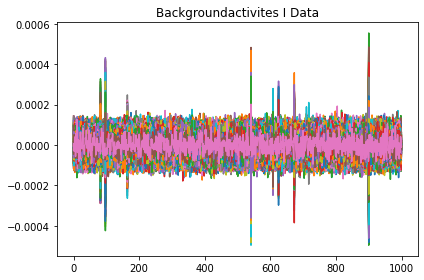

In [11]:
# plotting I data for BackgroundRF activities
plt.plot(I_Data_Fifth_BackgroundRFactivities)
plt.title("Backgroundactivites I Data")
plt.tight_layout()
plt.show()

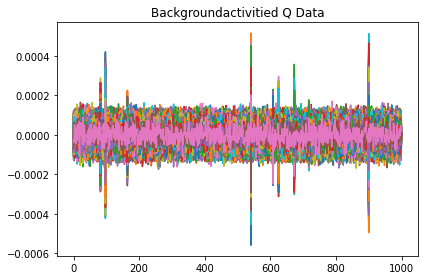

In [6]:
# plotting Q data for BackgroundRF activities
plt.plot(Q_Data_Fifth_BackgroundRFactivities)
plt.title("Backgroundactivitied Q Data")
plt.tight_layout()
plt.show()

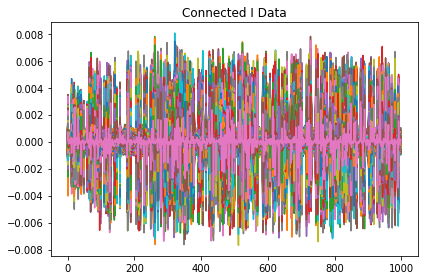

In [7]:
# Seperating I and Q  Connected
I_Data_Fifth_Connected = Fifth_Sticker_Connected_numpy[0:,0]
Q_Data_Fifth_Connected = Fifth_Sticker_Connected_numpy[0:,1]

I_Data_Fifth_Connected= I_Data_Fifth_Connected.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Fifth_Connected= Q_Data_Fifth_Connected.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Fifth_Connected_2Dim = np.concatenate((I_Data_Fifth_Connected,Q_Data_Fifth_Connected),axis=1)

# plotting I data for Connected activities

plt.plot(I_Data_Fifth_Connected[0:3877])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

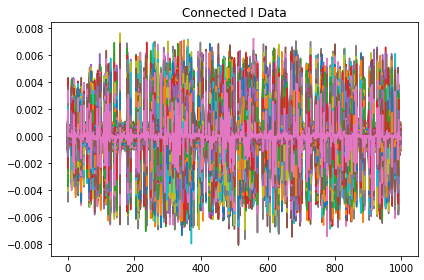

In [8]:
# plotting Q data for Connected activities

plt.plot(Q_Data_Fifth_Connected[0:3877])
plt.title("Connected I Data")
plt.tight_layout()
plt.show()

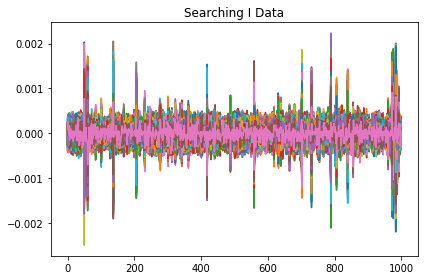

In [9]:
# Seperating I and Q from Searching

I_Data_Fifth_Searching = Fifth_Sticker_Searching_numpy[0:,0]
Q_Data_Fifth_Searching = Fifth_Sticker_Searching_numpy[0:,1]

I_Data_Fifth_Searching= I_Data_Fifth_Searching.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Fifth_Searching= Q_Data_Fifth_Searching.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Fifth_Searching_2Dim = np.concatenate((I_Data_Fifth_Searching,Q_Data_Fifth_Searching),axis=1)

# plotting I data for Searching activities

plt.plot(I_Data_Fifth_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

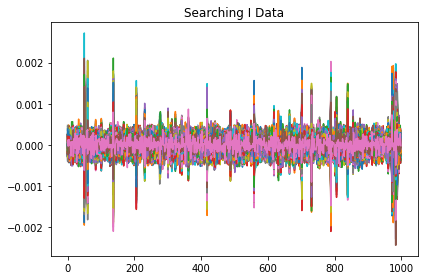

In [10]:
# plotting Q data for Searching activities

plt.plot(Q_Data_Fifth_Searching[0:3877])
plt.title("Searching I Data")
plt.tight_layout()
plt.show()

In [11]:
# Seperating the I and Q from Searching with WIFI established

I_Data_Fifth_Searching_WIFI_established = Fifth_Sticker_Searching_without_connected_numpy[0:,0]
Q_Data_Fifth_Searching_WIFI_established = Fifth_Sticker_Searching_without_connected_numpy[0:,1]

I_Data_Fifth_Searching_WIFI_established= I_Data_Fifth_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)
Q_Data_Fifth_Searching_WIFI_established= Q_Data_Fifth_Searching_WIFI_established.reshape(1000,NUMBER_OF_FEATURES)

Concatenate_IQ_Fifth_Searching_WIFI_established_2Dim = np.concatenate((I_Data_Fifth_Searching_WIFI_established,Q_Data_Fifth_Searching_WIFI_established),axis=1)


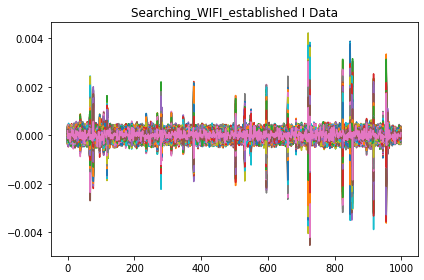

In [12]:
# plotting I data for Searching with WIFI established activities

plt.plot(I_Data_Fifth_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established I Data")
plt.tight_layout()
plt.show()

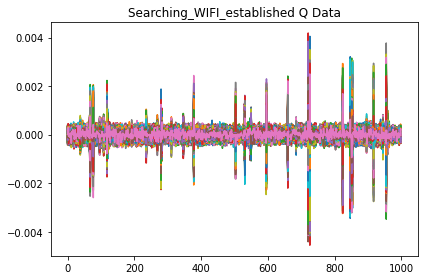

In [13]:
# plotting Q data for Searching with WIFI established activities

plt.plot(Q_Data_Fifth_Searching_WIFI_established[0:3877])
plt.title("Searching_WIFI_established Q Data")
plt.tight_layout()
plt.show()

In [14]:
from sklearn.preprocessing import RobustScaler,StandardScaler

def scaling_sticker (background,connected,searching,searchingWIFIestablished):
    
    global IQ_searching_WIFI_established_numpy_scaled
    global IQ_BackgroundRFactivites_numpy_scaled
    global IQ_connected_numpy_scaled
    global IQ_searching_numpy_scaled
    
      # Scalling each features
    
    scaler_backgroundRFactivites = StandardScaler()
    scaler_backgroundRFactivites_scaled = scaler_backgroundRFactivites.fit(background)
    IQ_BackgroundRFactivites_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(background)

    scaler_connected = StandardScaler()
    scaler_connected_scaled = scaler_connected.fit(connected)
    IQ_connected_numpy_scaled= scaler_connected_scaled.transform(connected)


    scaler_searching = StandardScaler()
    scaler_searching_scaled = scaler_searching.fit(searching)
    IQ_searching_numpy_scaled= scaler_backgroundRFactivites_scaled.transform(searching)

    scaler_searching_WIFI_established = StandardScaler()
    scaler_searching_WIFI_established_scaled = scaler_searching_WIFI_established.fit(searchingWIFIestablished)
    IQ_searching_WIFI_established_numpy_scaled= scaler_searching_WIFI_established_scaled.transform(searchingWIFIestablished)

In [15]:
scaling_sticker(Concatenate_IQ_Fifth_BackgroundRFactivities_2Dim,Concatenate_IQ_Fifth_Connected_2Dim,
               Concatenate_IQ_Fifth_Searching_2Dim,Concatenate_IQ_Fifth_Searching_WIFI_established_2Dim)

In [16]:
from sklearn.preprocessing import OneHotEncoder

Label =[['BackgroundRFactivities'],['Connected'],['Searching'],['Searching_WIFI_Establised']]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

enc = enc.fit(Label)

Labelled = enc.transform(Label)

print("The labels are :")
print('\n')
print(Labelled)
print('\n')

np.random.seed(2016)

# concatenate the labels created by one hot encoded to the dataset before shuffling


IQ_backgroundRFactivites_concatenate = np.tile(Labelled[0][np.newaxis,:],(IQ_BackgroundRFactivites_numpy_scaled.shape[0],1))
IQ_BackgroundRFactivites_dataset=np.concatenate((IQ_BackgroundRFactivites_numpy_scaled,IQ_backgroundRFactivites_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_BackgroundRFactivites_dataset.shape))

IQ_connected_concatenate = np.tile(Labelled[1][np.newaxis,:],(IQ_connected_numpy_scaled.shape[0],1))
IQ_connected_dataset=np.concatenate((IQ_connected_numpy_scaled,IQ_connected_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_connected_dataset.shape))

IQ_searching_concatenate = np.tile(Labelled[2][np.newaxis,:],(IQ_searching_numpy_scaled.shape[0],1))
IQ_searching_dataset=np.concatenate((IQ_searching_numpy_scaled,IQ_searching_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_dataset.shape))

IQ_searching_wifi_established_concatenate = np.tile(Labelled[3][np.newaxis,:],(IQ_searching_WIFI_established_numpy_scaled.shape[0],1))
IQ_searching_wifi_established_dataset=np.concatenate((IQ_searching_WIFI_established_numpy_scaled,IQ_searching_wifi_established_concatenate),axis=1)
print("Connected dataset shape : " + str(IQ_searching_wifi_established_dataset.shape))

print('\n')
print(IQ_BackgroundRFactivites_dataset[0:5])
print('\n')
print(IQ_connected_dataset[0:5])
print('\n')
print(IQ_searching_dataset[0:5])
print('\n')
print(IQ_searching_wifi_established_dataset[0:5])

The labels are :


[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)
Connected dataset shape : (1000, 6778)


[[ 0.75622814  2.00314922  1.25889316 ...  0.          0.
   0.        ]
 [-0.24932282 -1.16558698 -1.19321922 ...  0.          0.
   0.        ]
 [-0.77022387  0.07114845 -0.73765714 ...  0.          0.
   0.        ]
 [-0.01006527 -0.33647822 -0.2597414  ...  0.          0.
   0.        ]
 [ 0.39427441  1.16129346  0.33022563 ...  0.          0.
   0.        ]]


[[ 0.12437616  0.01420218  0.11266155 ...  1.          0.
   0.        ]
 [ 0.00816005 -0.0921743  -0.08483561 ...  1.          0.
   0.        ]
 [-0.01878556  0.03825415  0.0831748  ...  1.          0.
   0.        ]
 [-0.03949024 -0.27412124 -0.11233521 ...  1.          0.
   0.        ]
 [-0.28659707 -0.20271579 -0.08217539 ...  1.          0.
   0.        ]]


[[-0.64864311  0.5430643

In [17]:
import copy

# Stack all of the dataset into one huge array for shuffling with the labels
stacked_data=np.vstack((IQ_BackgroundRFactivites_dataset,IQ_connected_dataset,IQ_searching_dataset,IQ_searching_wifi_established_dataset))
Dataset_Label_shuffled = copy.copy(stacked_data)
np.random.shuffle(Dataset_Label_shuffled)

# Specifying the index length of training , validation and test set
# 70 (train) , 20 (validation) , 10(Test)

length_of_X_train = int(0.7*Dataset_Label_shuffled.shape[0]) #94836
length_of_X_validation = (int(0.2*Dataset_Label_shuffled.shape[0]))+length_of_X_train #27096 #121932


Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,0:6774]
print('The size of Training dataset is : {0}'.format(Train_Dataset.shape))
Y_Train_Dataset = Dataset_Label_shuffled[0:length_of_X_train,6774:]

Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,0:6774]
Y_Validation_Dataset = Dataset_Label_shuffled[length_of_X_train:length_of_X_validation,6774:]
print('The size of Validation dataset is : {0}'.format(Validation_Dataset.shape))

print('\n')
print('Reshaping it into 3 Dim :')
Train_Dataset=Train_Dataset.reshape(2800,6774,1)
Validation_Dataset=Validation_Dataset.reshape(800,6774,1)
print('The reshape size for Training dataset is {0}'.format(Train_Dataset.shape))
print('The reshape size for Validation dataset is {0}'.format(Validation_Dataset.shape))

The size of Training dataset is : (2800, 6774)
The size of Validation dataset is : (800, 6774)


Reshaping it into 3 Dim :
The reshape size for Training dataset is (2800, 6774, 1)
The reshape size for Validation dataset is (800, 6774, 1)


In [18]:
Filterone = 100
Filtertwo = 160
KernalSize = 10
BATCH_SIZE = 200
epoch = 100
dropout = 0.2

model_m = Sequential()
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu', input_shape=(6774,1)))
model_m.add(Conv1D(filters=Filterone, kernel_size=KernalSize, activation='relu'))
model_m.add(MaxPooling1D(3))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(Conv1D(filters=Filtertwo, kernel_size=KernalSize, activation='relu'))
model_m.add(GlobalMaxPooling1D())
model_m.add(Dropout(dropout))
model_m.add(Dense(4, activation='softmax'))

model_m.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model_m.summary()


history=model_m.fit(Train_Dataset,Y_Train_Dataset, epochs=epoch, batch_size=BATCH_SIZE,shuffle=True, verbose=1, validation_data=(Validation_Dataset,Y_Validation_Dataset), callbacks=[EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)])

_, accuracy_validation = model_m.evaluate(Validation_Dataset, Y_Validation_Dataset)
print('Accuracy_validation: %.2f' % (accuracy_validation*100))

_, accuracy_Train = model_m.evaluate(Train_Dataset, Y_Train_Dataset)
print('Accuracy_Training: %.2f' % (accuracy_Train*100))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 6765, 100)         1100      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 6756, 100)         100100    
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 2252, 100)         0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 2243, 160)         160160    
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 2234, 160)         256160    
_________________________________________________________________
global_max_pooling1d (Global (None, 160)               0         
_________________________________________________________________
dropout (Dropout)            (None, 160)               0

In [19]:
model_m.save("{MODEL} Fifth_Sticker_TRAINED")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: {MODEL} Fifth_Sticker_TRAINED/assets


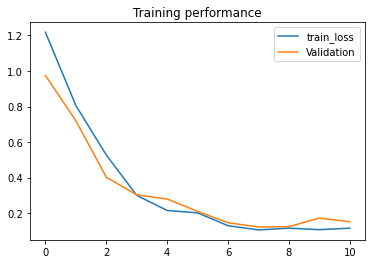

In [20]:
plt.figure()
plt.title('Training performance')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='Validation')
plt.legend()
plt.show()

# Model Trained from First Sticker

In [21]:
from tensorflow import keras
load_first_sticker_model = keras.models.load_model("{MODEL} First_Sticker_TRAINED")
_,accuracy=load_first_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 30ms/step - loss: 2.7780 - accuracy: 0.5825
Accuracy: 58.25


# Model Trained from Third Sticker

In [22]:
from tensorflow import keras
load_Third_sticker_model = keras.models.load_model("{MODEL} Third_Sticker_TRAINED")
_,accuracy=load_Third_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 28ms/step - loss: 0.2278 - accuracy: 0.9187
Accuracy: 91.87


# Model Trained from Fourth Sticker

In [23]:
from tensorflow import keras
load_Fourth_sticker_model = keras.models.load_model("{MODEL} Fourth_Sticker_TRAINED")
_,accuracy=load_Fourth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 28ms/step - loss: 0.1603 - accuracy: 0.9650
Accuracy: 96.50


# Model Trained from Fifth Sticker

In [24]:
from tensorflow import keras
load_Fifth_sticker_model = keras.models.load_model("{MODEL} Fifth_Sticker_TRAINED")
_,accuracy=load_Fifth_sticker_model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy*100))

25/25 [==============================] - 1s 28ms/step - loss: 0.1517 - accuracy: 0.9725
Accuracy: 97.25


# Model Trained from every sticker

In [43]:
from tensorflow import keras
load_ALL_Model = keras.models.load_model("{MODEL} Entire_Sticker_TRAINED")
_,accuracy_loaded_first_model=load_ALL_Model.evaluate(Validation_Dataset,Y_Validation_Dataset)
print('Accuracy: %.2f' % (accuracy_loaded_first_model*100))

25/25 [==============================] - 1s 24ms/step - loss: 1.1266 - accuracy: 0.8263
Accuracy: 82.63


# Numpy

In [93]:
def window(Data, window_size = 100, overlap= 50 , copy = False):
    sh = (Data.size - window_size + 1, window_size)
    st = Data.strides * 2
    view = np.lib.stride_tricks.as_strided(Data, strides = st, shape = sh)[0::overlap]
    if copy:
        return view.copy()
    else:
        return view

In [94]:
I_Data_Fifth_BackgroundRFactivities_new = Fifth_Sticker_BackgroundRFactivities_numpy[0:,0]

In [95]:
I_Data_Fifth_BackgroundRFactivities_new.shape

(3387000,)

In [96]:
I_Data_Fifth_BackgroundRFactivities_new

array([ 2.561e-05,  7.067e-05,  4.294e-05, ..., -4.171e-05, -1.940e-05,
       -1.128e-05])

In [97]:
after_window=window(I_Data_Fifth_BackgroundRFactivities_new)

In [98]:
print(after_window[0][50:100])
print(after_window[1][0:50])

[-8.230e-06  6.283e-05  6.860e-06 -6.109e-05  3.157e-05  1.150e-06
 -5.740e-06  6.278e-05  1.019e-05  4.110e-06  7.474e-05 -1.682e-05
 -7.303e-05 -2.020e-06  3.709e-05 -1.988e-05 -3.163e-05  7.300e-07
  2.353e-05 -9.920e-06 -2.097e-05  2.765e-05  4.510e-06  3.790e-06
 -2.072e-05  3.578e-05  3.427e-05 -2.486e-05  6.486e-05 -1.322e-05
 -5.212e-05 -2.328e-05 -6.700e-05  6.650e-06 -6.470e-06  5.717e-05
  7.725e-05  4.150e-06 -4.094e-05 -3.271e-05  3.653e-05  2.240e-05
 -6.451e-05 -5.986e-05  4.758e-05 -1.839e-05 -4.241e-05 -3.401e-05
 -3.408e-05  6.352e-05]
[-8.230e-06  6.283e-05  6.860e-06 -6.109e-05  3.157e-05  1.150e-06
 -5.740e-06  6.278e-05  1.019e-05  4.110e-06  7.474e-05 -1.682e-05
 -7.303e-05 -2.020e-06  3.709e-05 -1.988e-05 -3.163e-05  7.300e-07
  2.353e-05 -9.920e-06 -2.097e-05  2.765e-05  4.510e-06  3.790e-06
 -2.072e-05  3.578e-05  3.427e-05 -2.486e-05  6.486e-05 -1.322e-05
 -5.212e-05 -2.328e-05 -6.700e-05  6.650e-06 -6.470e-06  5.717e-05
  7.725e-05  4.150e-06 -4.094e-05 -3.2